In [7]:
using Luxor, ColorSchemes
include("src/LuxorUtils.jl")
include("src/Reticles.jl")
include("src/LuxorPoints.jl")
include("src/Circle.jl")
include("src/LuxorCircle.jl")
include("src/MobiusTransformationV2.jl")
include("src/LuxorOrbits.jl")
include("src/SchottkyGroups.jl")
include("src/AlgorithmsBFS.jl")

drawSchottkyarraysBFS (generic function with 1 method)

# Ejercicio 2

Dibuja la órbita de los círculos $C_\mathtt{a} : \vert z − 2i\vert  = 1$, $C_\mathtt{A} : \vert z\vert  = 4$,
$C_\mathtt{b} : \vert z + 2\vert  = 3/2$, $C_\mathtt{B} : \vert z − 2\vert  = 3/2$ bajo un grupo de Schottky que empareje $C_\mathtt{A}$ con $C_\mathtt{a}$ y $C_\mathtt{B}$ con $C_\mathtt{b}$.

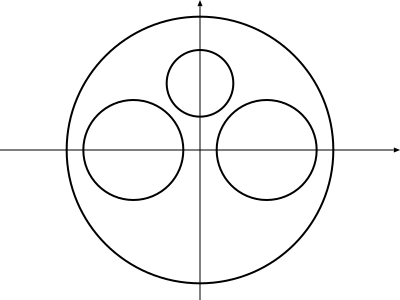

In [8]:
# Primero dibujamos los circulos

Ca, CA, Cb, CB = Circ(2im, 1), Circ(0, 4), Circ(-2, 3/2), Circ(2, 3/2)

circulos = [Ca, CA, Cb, CB]

w, h = 400, 300

@draw begin
    configurecanvas(-6, 6, -4.5, 4.5, width=w, height=h)
    drawcircle.(circulos)
end w h

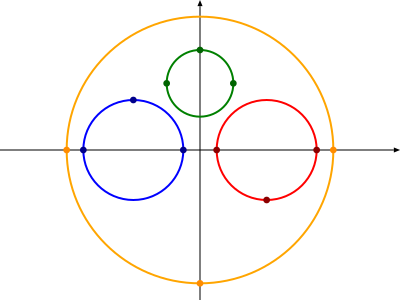

In [9]:
# En virtud de que tres circulos están en el interior de uno mismo, 
# debemos elegir las transformaciones del grupo de Schottky de tal suerte que
# los interiores y exteriores estén "bien definidos".

# Para esto, elegimos tres puntos en el círculo de radio 4 con centro en el 
# orígen en orden de las manecillas del reloj y otros tres puntos en sentido contrario.

# Ca ↦ CA
# ext(CA) ↦(a) int(Ca)
# int(Ca) ↦(A) ext(CA)
# ext(Ca) ↦(A) int(CA)

w, h = 400, 300

# Puntos de CA para construir a
z1, z2, z3 = pickpoint(CA, 0), pickpoint(CA, -π/2), pickpoint(CA, -π)

# Puntos de Ca para construir a
w1, w2, w3 = pickpoint(Ca, 0), pickpoint(Ca, π/2), pickpoint(Ca, π)

# Puntos de Cb para construir b
q1, q2, q3 = pickpoint(Cb, 0), pickpoint(Cb, π/2), pickpoint(Cb, π)

# Puntos de CB para construir B
s1, s2, s3 = pickpoint(CB, 0), pickpoint(CB, -π/2), pickpoint(CB, -π)

puntos = [z1,z2, z3, w1, w2, w3, q1, q2, q3, s1, s2, s3]

@draw begin
    configurecanvas(-6, 6, -4.5, 4.5, width=w, height=h)
    for circulo in [(CA, [z1,z2,z3], "orange"), (Ca, [w1,w2,w3], "green"), (Cb, [q1,q2,q3], "blue"), (CB, [s1,s2,s3], "red")]
        circunf, puntos, color = circulo
        sethue(color)
        drawcircle(circunf)
        sethue("dark"*color)
        [ circle(point(z), 0.1, :fill) for z in puntos ]#w1,w2,w3
    end
end w h

# De esta forma garantizamos que el exterior de Ca, Cb, y CB 
# está en la cerradura del interior de CA unión el exterior de CA

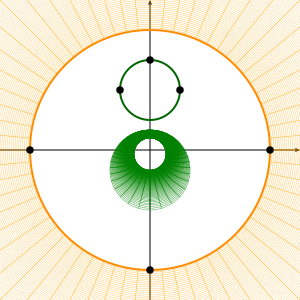

In [10]:
# Construimos las transformaciones tales que Ca ↦ CA y Cb ↦ CB
#a = MobT(z1, z2, z3, w1, w2, w3)
A = MobT(z1, z2, z3, w1, w2, w3)
a = inverse(A)

intCA = radreticle(0, 2pi, CA.radius, 2*CA.radius, center=CA.center, cols=64, rows=64, n=1000, m=200);
extCA = radreticle(0, 2pi, 0, CA.radius, center=CA.center, cols=64, rows=64, n=1000, m=200);
intCa = radreticle(0, 2pi, 0, Ca.radius, center=Ca.center, cols=64, rows=64, n=1000, m=200);
extCa = radreticle(0, 2pi, CA.radius, 2*CA.radius, center=CA.center, cols=64, rows=64, n=1000, m=200);

## Si a es un generador de un grupo de Schottky, entonces debe ser tal que a( int CA ) = ext Ca

# CA es naranja
# Ca es verde

w, h = 300, 300
@draw begin
    configurecanvas(-5,5,-5,5,width=w,height=h)
    sethue("orange"); [ circle(point(z), 0.01, :fill) for z in intCA ]
    sethue("darkorange");
    drawcircle(CA);
    sethue("green"); [ circle(point(a(z)), 0.01, :fill) for z in intCA ]
    sethue("darkgreen");
    drawcircle(Ca);
    sethue("black"); #drawcircle(CA); drawcircle(Ca)
    [ circle(point(z), 0.125, :fill) for z in [z1,z2,z3,w1,w2,w3] ]
end w h

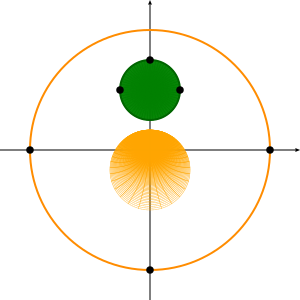

In [11]:
# Además, A(int Ca) = ext CA

w, h = 300, 300
@draw begin
    configurecanvas(-5,5,-5,5,width=w,height=h)
    sethue("green"); [ circle(point(z), 0.01, :fill) for z in intCa ]
    sethue("darkgreen");
    drawcircle(Ca);
    sethue("orange"); [ circle(point(A(z)), 0.01, :fill) for z in intCa ]
    sethue("darkorange");
    drawcircle(CA);
    sethue("black"); #drawcircle(CA); drawcircle(Ca)
    [ circle(point(z), 0.125, :fill) for z in [z1,z2,z3,w1,w2,w3] ]
end w h

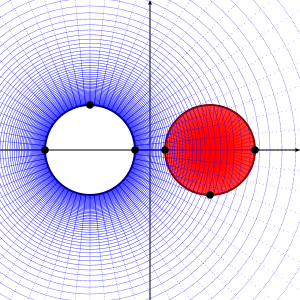

In [12]:
# Puntos de Cb para construir b
q1, q2, q3 = pickpoint(Cb, 0), pickpoint(Cb, π/2), pickpoint(Cb, π)

# Puntos de CB para construir B
s1, s2, s3 = pickpoint(CB, 0), pickpoint(CB, -π/2), pickpoint(CB, -π)


intCB = radreticle(0, 2pi, 0, CB.radius, center=CB.center, cols=64, rows=64, n=1000, m=200);
extCB = radreticle(0, 2pi, CB.radius, 2*CB.radius, center=CB.center, cols=64, rows=64, n=1000, m=200);
intCb = radreticle(0, 2pi, 0, Cb.radius, center=Cb.center, cols=64, rows=64, n=1000, m=200);
extCb = radreticle(0, 2pi, Cb.radius, 2*Cb.radius, center=Cb.center, cols=64, rows=64, n=1000, m=200);

b = MobT(s1, s2, s3, q1, q2, q3)#MobT(q1, q2, q3, s1, s2, s3)
#b = MobT(q1, q2, q3, s1, s2, s3)#MobT(s1, s2, s3, q1, q2, q3)
B = inverse(b)

# Cb es azul
# CB es rojo

## Si b es un generador de un grupo de Schottky, entonces debe ser tal que b( int CB ) = ext Cb

w, h = 300, 300
@draw begin
    configurecanvas(-5,5,-5,5,width=w,height=h)
    sethue("red"); [ circle(point(z), 0.01, :fill) for z in intCB ]
    sethue("darkred");
    drawcircle(CB);
    sethue("blue"); [ circle(point(b(z)), 0.01, :fill) for z in intCB ]
    sethue("darkblue");
    drawcircle(Cb);
    sethue("black"); #drawcircle(CA); drawcircle(Ca)
    [ circle(point(z), 0.125, :fill) for z in [s1,s2,s3,q1,q2,q3] ]
end w h

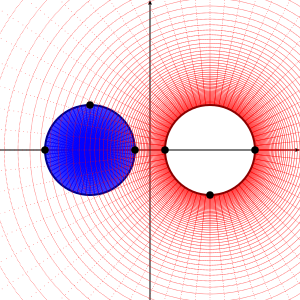

In [13]:
# Además, B(int Cb) = ext CB

w, h = 300, 300
@draw begin
    configurecanvas(-5,5,-5,5,width=w,height=h)
    sethue("blue"); [ circle(point(z), 0.01, :fill) for z in intCb ]
    sethue("darkblue");
    drawcircle(Cb);
    sethue("red"); [ circle(point(B(z)), 0.01, :fill) for z in intCb ]
    sethue("darkred");
    drawcircle(CB);
    sethue("black"); #drawcircle(CA); drawcircle(Ca)
    [ circle(point(z), 0.125, :fill) for z in [s1,s2,s3,q1,q2,q3] ]
end w h

Por lo tanto, las transformaciones son tales como las queremos. Generamos entonces las órbitas que pide el ejercicio.

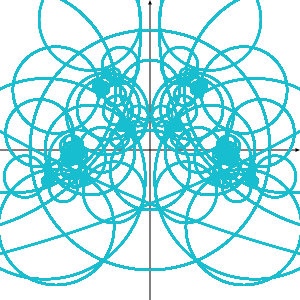

In [14]:
gen = [a, b, A, B]; circs = [Ca, Cb, CA, CB]; fun = drawcircles;

w, h = 300, 300
@draw begin
    configurecanvas(-5,5,-5,5,width=w,height=h)
    draworbitBFS(gen, circs, N=4, drawfunction=fun, colormap=colorschemes[:tab10])
    
end w h